## imports
in this section we import every library and other stuffs we want.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV


## Variables
we are defining some variables here so you can change them from here.

In [2]:
random_state= 42
n_splits= 5
n_init= 10
scoring=['accuracy', 'precision', 'recall', 'f1']
metrics=['Accuracy', 'Precision', 'Recall', 'F1']
param_grids = {
    "DecisionTree": {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_depth': [5, 10],
    },
    "RandomForest": {
        'n_estimators': [10, 25, 100],
        'criterion': ['gini', 'entropy'],
        'min_samples_split': [2, 5],
        'max_depth': [5, 10, 20],
    },
    "XGBoost": {
        'learning_rate': [0.01, 0.1],
        'n_estimators': [50, 100],
        'max_depth': [5],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
    },
    "SVM": {
        'C': [1, 10],
        'kernel': ['rbf'],
        'gamma': [0.1, 0.01, 1],
    },
    "MLP": {
        'hidden_layer_sizes': [(200, 100)],
        'alpha': [0.001],
        'activation': ['tanh'],
        'learning_rate': ['constant'],
        'max_iter': [500],
    }
}

## import data
so I checked our dataset link and there was a "IMPORT IN PYTHON" button so I clicked on it and there was a snippet for importing our dataset in our code which you can see it below.

as you can see in the last part of this snippet I added target column to our dataset and I used "total_UPDRS" as our targets which seems is a better feature after I checked the paper.

In [3]:
  
parkinson_telemonitoring = fetch_ucirepo(id=189) 
  
X = parkinson_telemonitoring.data.features 
y = parkinson_telemonitoring.data.targets 
  
df = pd.DataFrame(X)

## classify
after that I had to classify our targets into 2 classes 0 and 1 (making them binary)

so I implemented these functions here so we can use them and check the best result for ourself.

#### kmeans
The K-means clustering algorithm is a method used in data analysis to partition a dataset into K distinct, non-overlapping subgroups (clusters), where each data point belongs to the cluster with the nearest mean.

so we are using this method with K=2.

In [4]:
def Kmeans_classify():
    X_clustering = df.drop('total_UPDRS', axis=1)
    kmeans = KMeans(n_clusters=2, n_init=n_init, random_state=random_state).fit(X_clustering)
    df['target'] = kmeans.labels_
    counts = df['target'].value_counts()
    print(counts)

def simple_classify(type):
    threshold = df['total_UPDRS'].median() if(type=='median') else df['total_UPDRS'].mean()
    df['target'] = (df['total_UPDRS'] >= threshold).astype(int)
    counts = df['target'].value_counts()
    print(counts)



## choose method here!
so I added all methods here and you have to uncomment one of them and comment all other ones and it will classify our target with that method.

In [5]:
df['total_UPDRS']= y['total_UPDRS']
# Kmeans_classify()
simple_classify('median')
# simple_classify('mean')
df = df.drop('total_UPDRS', axis=1)
df.describe()

target
1    2940
0    2935
Name: count, dtype: int64


,age,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,sex,target
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,64.804936,92.863722,0.006154,0.000044,0.002987,0.003277,0.008962,0.034035,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589,0.317787,0.500426
std,8.821524,53.445602,0.005624,0.000036,0.003124,0.003732,0.009371,0.025835,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498,0.465656,0.500042
min,36.000000,-4.262500,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983,0.000000,0.000000
25%,58.000000,46.847500,0.003580,0.000022,0.001580,0.001820,0.004730,0.019120,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340,0.000000,0.000000
50%,65.000000,91.523000,0.004900,0.000034,0.002250,0.002490,0.006750,0.027510,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500,0.000000,1.000000
75%,72.000000,138.445000,0.006800,0.000053,0.003290,0.003460,0.009870,0.039750,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490,1.000000,1.000000
max,85.000000,215.490000,0.099990,0.000446,0.057540,0.069560,0.172630,0.268630,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730,1.000000,1.000000


## split data
split data into train and test after that I normalized my data

In [6]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('target', axis=1), 
                                                    df['target'],
                                                    test_size=0.2,
                                                    random_state=random_state)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(x_train)
scaled_X_test = scaler.transform(x_test)
print(f"Train Features: {x_train.shape}")
print(f"Test Features: {x_test.shape}")

Train Features: (4700, 19)
Test Features: (1175, 19)


## Models
now I want to calculate cross val scores for each method
so I defined this

In [7]:
models = {
    "DecisionTree": DecisionTreeClassifier(random_state=random_state),
    "RandomForest": RandomForestClassifier(random_state=random_state),
    "XGBoost": XGBClassifier(random_state=random_state),
    "SVM": SVC(random_state=random_state),
    "MLP": MLPClassifier(random_state=random_state)
}

## create models
now lets create models fitting them and predict with them

and actually calculate cross validate scores

In [8]:
best_params = {}
confusion_matrices = {}
cv_scores = {metric: {name: [] for name in models.keys()} for metric in scoring}
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(scaled_X_train, y_train)
    best_params[name] = grid_search.best_params_
    for metric in cv_scores.keys():
        scores = cross_val_score(grid_search, scaled_X_train, y_train, cv=cv, scoring=metric)
        cv_scores[metric][name].extend(scores)
        print(f"average of {metric} for {name} is= {scores.mean()}")

    y_pred = grid_search.predict(scaled_X_test)
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)
    test_accuracy= accuracy_score(y_test, y_pred)
    print(f"{name}::: accuracy on test data prediction is= {test_accuracy}")
    print(f"{name}::: {best_params[name]}")


average of accuracy for DecisionTree is= 0.9404255319148935
average of precision for DecisionTree is= 0.943481159265942
average of recall for DecisionTree is= 0.9382493639588633
average of f1 for DecisionTree is= 0.9405782562835207
DecisionTree::: accuracy on test data prediction is= 0.9557446808510638
DecisionTree::: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
average of accuracy for RandomForest is= 0.9217021276595745
average of precision for RandomForest is= 0.9088901013882177
average of recall for RandomForest is= 0.9386632386139679
average of f1 for RandomForest is= 0.9234491693926661
RandomForest::: accuracy on test data prediction is= 0.9370212765957446
RandomForest::: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
average of accuracy for XGBoost is= 0.9665957446808511
average of precision for XGBoost is= 0.9687514002339783
average of recall for XGBoost is= 0.9648878417601319

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

average of accuracy for MLP is= 0.9163829787234044


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

average of precision for MLP is= 0.9146926241101848


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

average of recall for MLP is= 0.9196339628050311


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

average of f1 for MLP is= 0.9171046613993352
MLP::: accuracy on test data prediction is= 0.9378723404255319
MLP::: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (200, 100), 'learning_rate': 'constant', 'max_iter': 500}


## Plots
Now we want to draw box plots to find out which method was the best

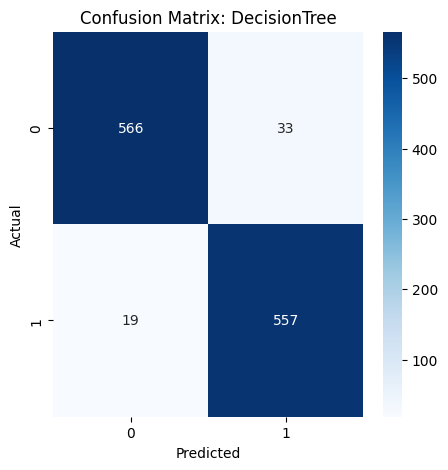

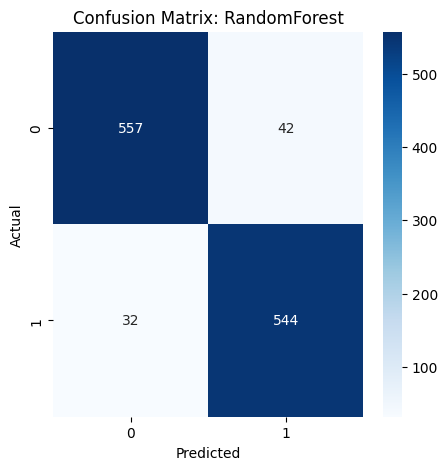

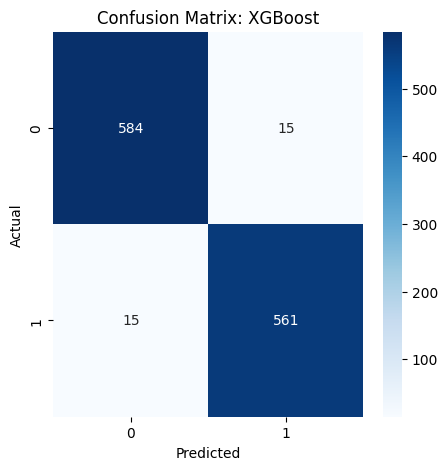

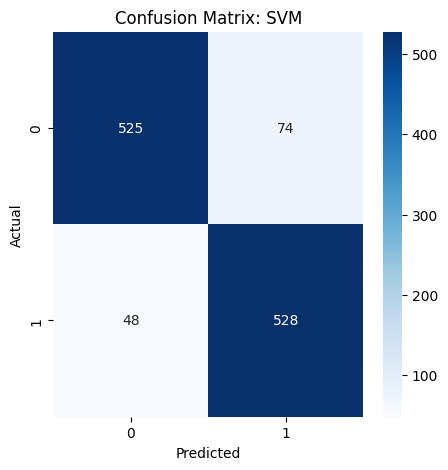

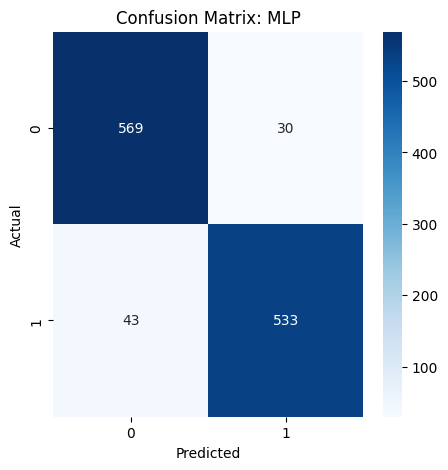

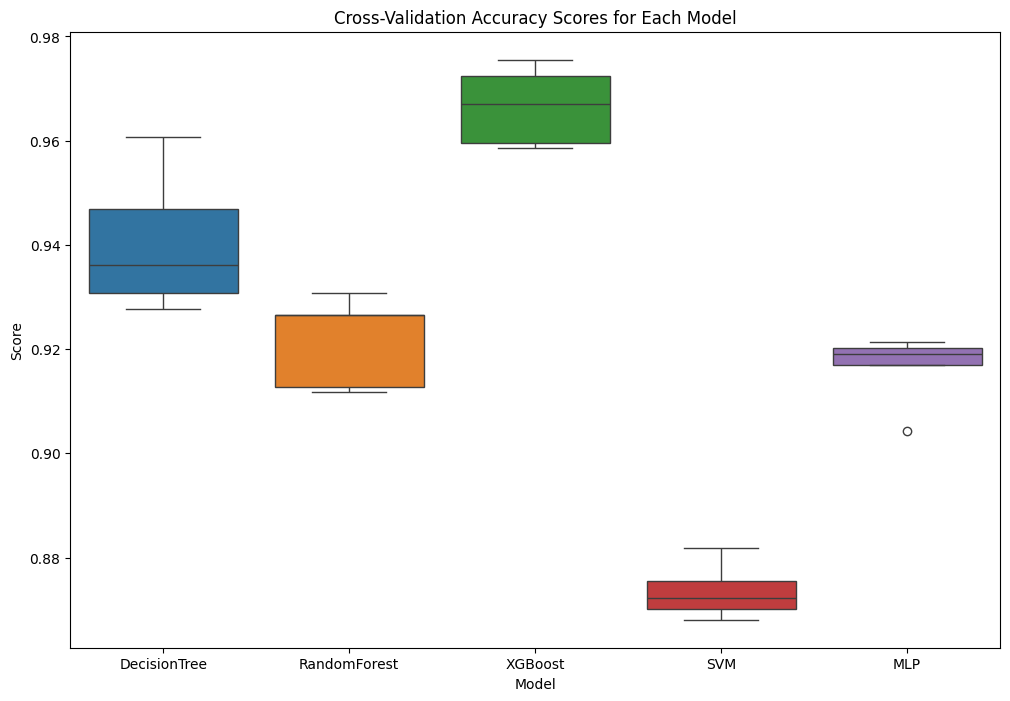

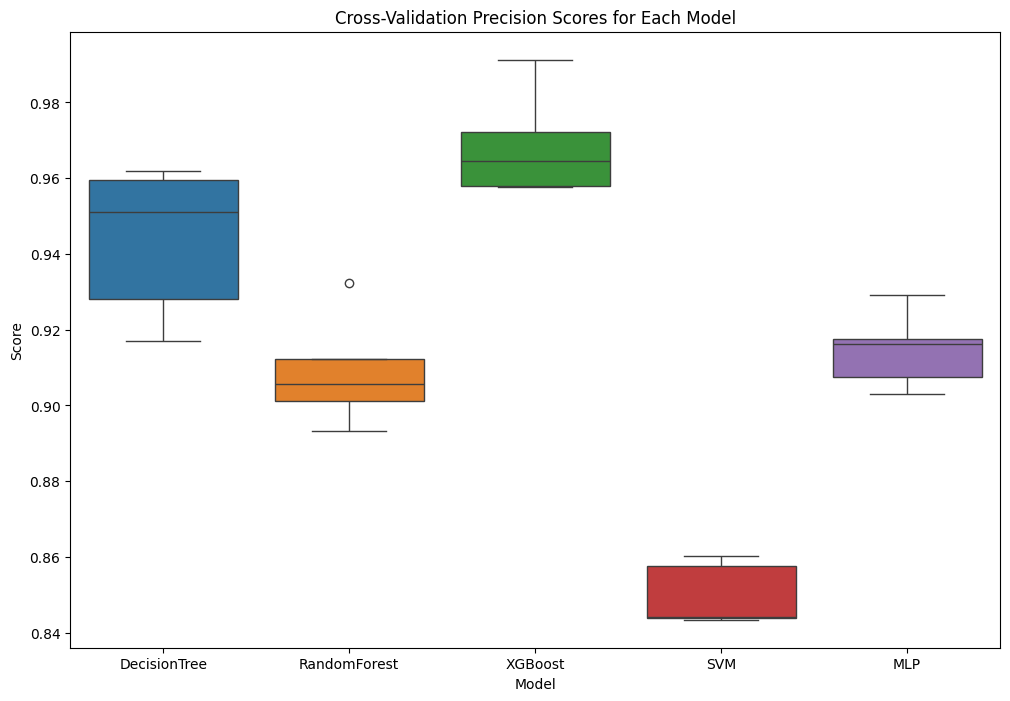

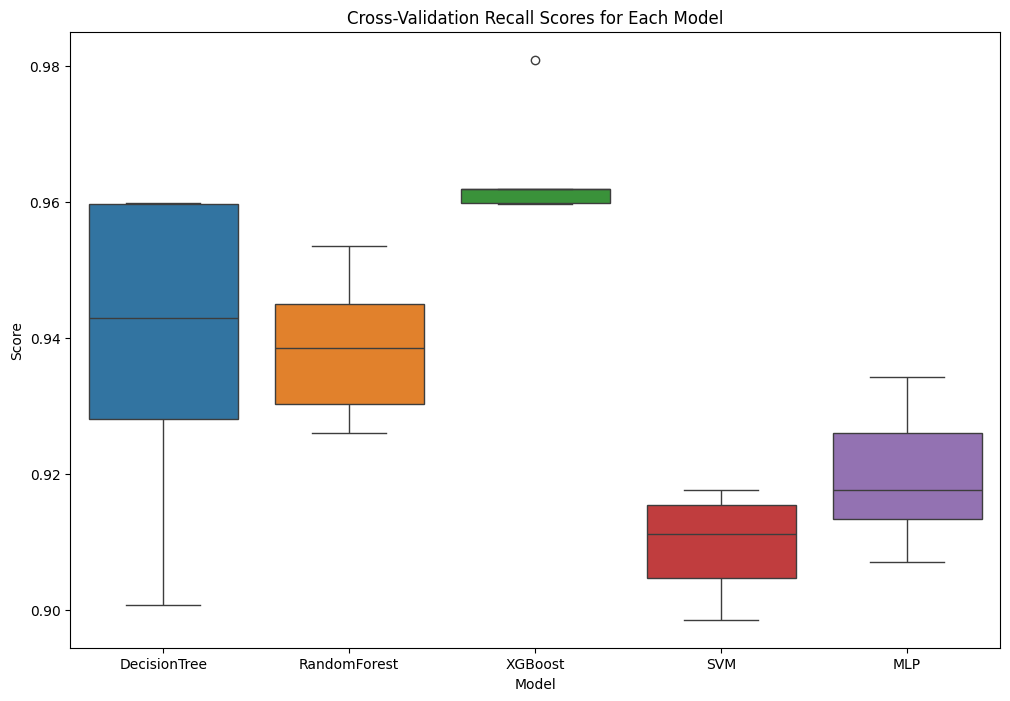

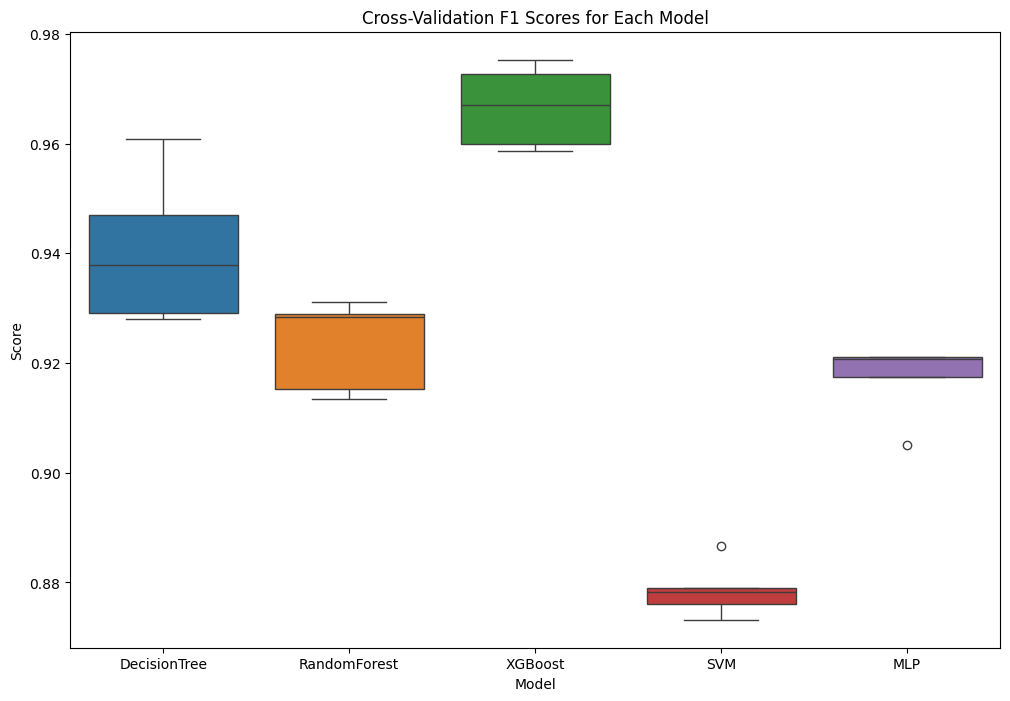

In [9]:
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

for name, cm in confusion_matrices.items():
    plot_confusion_matrix(cm, name)

for metric, scores in cv_scores.items():
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=pd.DataFrame(scores))
    plt.title(f'Cross-Validation {metric.capitalize()} Scores for Each Model')
    plt.ylabel('Score')
    plt.xlabel('Model')
    plt.show()